<a href="https://colab.research.google.com/github/yavuzuzun/projects/blob/main/GaussianMixtureModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Gaussian mixture model (GMM) is a probabilistic model that represents the probability distribution of a dataset as a weighted sum of Gaussian distributions. It assumes that the data is generated from a mixture of K Gaussian distributions, each having its own mean and covariance matrix. The model learns to assign each data point to one of the K distributions and estimate the parameters of each distribution.

More formally, a Gaussian mixture model is defined as follows:

Given a dataset D={x1, x2, ..., xn}, the GMM assumes that each data point xi is generated from one of K Gaussian distributions. Let z be a K-dimensional binary latent variable where zi=1 if xi is generated from the i-th Gaussian distribution and zi=0 otherwise. The joint distribution of the data and the latent variables is given by:

P(x, z) = ∏i^K [N(x; μi, Σi)]^(zi) * [πi]^(zi)

where N(x; μi, Σi) is the multivariate Gaussian distribution with mean μi and covariance matrix Σi, πi is the prior probability of the i-th Gaussian, and ∑πi=1.

The GMM model parameters, namely the means {μ1, μ2, ..., μK}, covariance matrices {Σ1, Σ2, ..., ΣK}, and priors {π1, π2, ..., πK}, are estimated using the Expectation-Maximization (EM) algorithm. The EM algorithm iteratively estimates the posterior probabilities of the latent variables given the data (E-step) and updates the model parameters to maximize the log-likelihood of the data (M-step).

Once the GMM is trained, it can be used for various tasks such as clustering, density estimation, and data generation. Clustering involves assigning each data point to its most probable Gaussian distribution, while density estimation involves computing the probability density of a new data point. Data generation involves sampling from the learned distribution by first sampling a Gaussian component according to the priors and then sampling a data point from the selected Gaussian distribution.

# Using prepackage

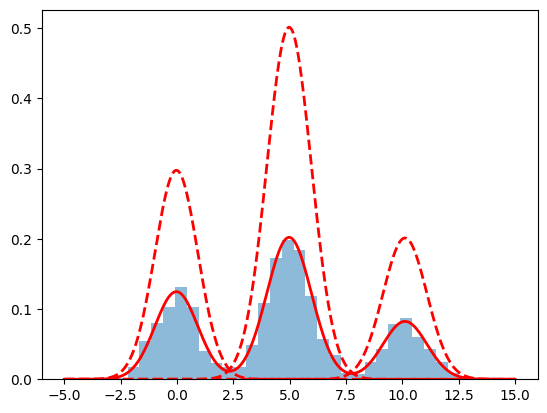

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate sample dataset
np.random.seed(42)
n_samples = 1000
X = np.concatenate([np.random.normal(0, 1, int(0.3 * n_samples)),
                     np.random.normal(5, 1, int(0.5 * n_samples)),
                     np.random.normal(10, 1, int(0.2 * n_samples))]).reshape(-1, 1)

# Fit Gaussian Mixture Model
n_components = 3
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)

# Plot results
plt.hist(X, bins=30, density=True, alpha=0.5)
x = np.linspace(-5, 15, 1000)
y = np.exp(gmm.score_samples(x.reshape(-1, 1)))
plt.plot(x, y, linewidth=2, color='r')
for i in range(n_components):
    y = gmm.weights_[i] * np.exp(-(x - gmm.means_[i]) ** 2 / (2 * gmm.covariances_[i]))
    plt.plot(x, y.T, linewidth=2, linestyle='--', color='r')
plt.show()

In this example, we first generate a sample dataset consisting of 1000 samples drawn from a mixture of three Gaussian distributions with means 0, 5, and 10, and unit variances. Then, we fit a Gaussian Mixture Model with 3 components to the dataset using the GaussianMixture class from scikit-learn. Finally, we plot the histogram of the data along with the estimated density function of the fitted GMM.

# Selecting optimum number of components

The optimal number of components is: 3


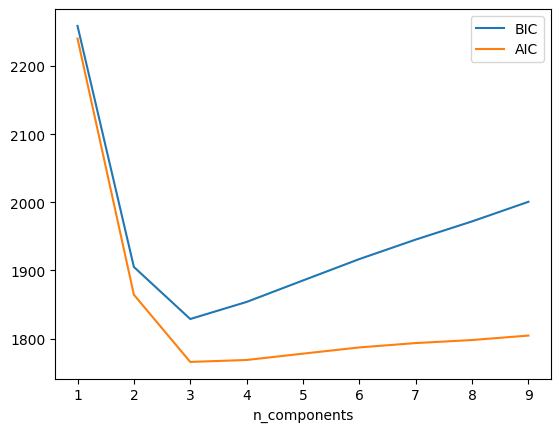

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate a toy dataset with three blobs
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

# Fit Gaussian mixture models with different numbers of components
n_components_range = range(1, 10)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=0).fit(X) for n in n_components_range]

# Calculate BIC and AIC for each model
bic = [m.bic(X) for m in models]
aic = [m.aic(X) for m in models]

# Plot BIC and AIC as functions of the number of components
plt.plot(n_components_range, bic, label='BIC')
plt.plot(n_components_range, aic, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# Select the model with the lowest BIC (or AIC)
best_idx = np.argmin(bic)
best_n_components = n_components_range[best_idx]
print("The optimal number of components is:", best_n_components)


In this code, we first generate a toy dataset with three blobs using the make_blobs function from Scikit-Learn. Then, we fit Gaussian mixture models with different numbers of components using the GaussianMixture class from Scikit-Learn, ranging from 1 to 10 components. For each model, we calculate the BIC and AIC using the bic and aic methods, respectively. Finally, we plot the BIC and AIC as functions of the number of components, and select the model with the lowest BIC (or AIC) as the optimal one. In this example, the optimal number of components is 3, which matches the true number of clusters in the dataset.

### What is BIC and AIC

BIC (Bayesian Information Criterion) and AIC (Akaike Information Criterion) are commonly used criteria for model selection and evaluation in statistical modeling, including Gaussian mixture models. Both BIC and AIC are based on the principle of balancing the model complexity and goodness-of-fit. They can be used to compare different models with different numbers of parameters and help choose the best model that fits the data well without overfitting.

BIC and AIC are both derived from the likelihood function of the data, which measures how well the model fits the data. The likelihood function takes into account both the goodness of fit and the number of parameters in the model. BIC penalizes models with more parameters more heavily than AIC does, making it more conservative in selecting a model with fewer parameters.

In Gaussian mixture models, BIC and AIC can be used to determine the optimal number of components in the mixture. The model with the lowest BIC or AIC score is considered the best model. Typically, one would try different numbers of components (i.e., different models) and select the one with the lowest BIC or AIC score.

The BIC and AIC formulas are as follows:

BIC = -2 log(L) + k log(n)
AIC = -2 log(L) + 2k

where L is the maximum likelihood of the model, k is the number of parameters in the model, and n is the sample size. The model with the lowest BIC or AIC score is preferred.

# From scratch

In [8]:
import numpy as np

class GaussianMixtureModel:
    def __init__(self, k, max_iter=100, tolerance=1e-4):
        self.k = k
        self.max_iter = max_iter
        self.tolerance = tolerance

    def fit(self, X):
        self.X = X
        self.n, self.d = X.shape

        # initialize means, covariances and mixing coefficients
        self.means = X[np.random.choice(self.n, self.k, replace=False), :]
        self.covs = [np.eye(self.d)] * self.k
        self.mixing_coeffs = np.ones(self.k) / self.k

        # iterate until convergence or max iterations reached
        for iteration in range(self.max_iter):
            # calculate responsibilities
            responsibilities = np.zeros((self.n, self.k))
            for j in range(self.k):
                responsibilities[:, j] = self.mixing_coeffs[j] * self.gaussian_pdf(self.X, self.means[j], self.covs[j])
            responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

            # calculate new means, covariances and mixing coefficients
            new_means = np.zeros((self.k, self.d))
            new_covs = [np.zeros((self.d, self.d))] * self.k
            new_mixing_coeffs = np.zeros(self.k)

            for j in range(self.k):
                Nj = np.sum(responsibilities[:, j])
                new_means[j, :] = np.sum(responsibilities[:, j].reshape(-1, 1) * self.X, axis=0) / Nj
                diff = self.X - new_means[j, :]
                new_covs[j] = np.dot(responsibilities[:, j] * diff.T, diff) / Nj
                new_mixing_coeffs[j] = Nj / self.n

            # check for convergence
            mean_diff = np.mean(np.abs(new_means - self.means))
            cov_diff = np.mean([np.abs(new_covs[j] - self.covs[j]) for j in range(self.k)])
            mixing_diff = np.mean(np.abs(new_mixing_coeffs - self.mixing_coeffs))
            if mean_diff < self.tolerance and cov_diff < self.tolerance and mixing_diff < self.tolerance:
                break

            # update means, covariances and mixing coefficients
            self.means = new_means
            self.covs = new_covs
            self.mixing_coeffs = new_mixing_coeffs

    def gaussian_pdf(self, X, mean, cov):
        n = X.shape[0]
        diff = X - mean
        return (1 / np.sqrt(((2 * np.pi) ** self.d) * np.linalg.det(cov))) * np.exp(-0.5 * np.sum(diff @ np.linalg.inv(cov) * diff, axis=1))

    def predict(self, X):
        responsibilities = np.zeros((X.shape[0], self.k))
        for j in range(self.k):
            responsibilities[:, j] = self.mixing_coeffs[j] * self.gaussian_pdf(X, self.means[j], self.covs[j])
        return np.argmax(responsibilities, axis=1)


The code defines a class called `GaussianMixtureModel`, which implements the Gaussian mixture model (GMM) algorithm. The GMM is a probabilistic model that represents the probability distribution of a random variable as a weighted sum of Gaussian distributions. The class takes as input the number of Gaussian components to use (`k`), the maximum number of iterations (`max_iter`) and a tolerance value (`tolerance`) that determines the convergence criterion for the iterative algorithm. 

The `fit` method of the `GaussianMixtureModel` class takes a matrix of data `X` and fits a GMM to the data. The algorithm initializes the means, covariances, and mixing coefficients for each Gaussian component. It then iterates until convergence or the maximum number of iterations is reached. In each iteration, the algorithm calculates the responsibilities of each data point to each Gaussian component, which represents the probability that the data point belongs to that component. Then, it calculates new means, covariances, and mixing coefficients using the current responsibilities. The algorithm checks for convergence by comparing the differences between the old and new means, covariances, and mixing coefficients to the tolerance value. If the differences are smaller than the tolerance value, the algorithm stops iterating.

The `gaussian_pdf` method calculates the probability density function of a multivariate Gaussian distribution given a matrix of data `X`, a mean vector `mean`, and a covariance matrix `cov`. The function uses the formula for the multivariate Gaussian probability density function to calculate the probability for each data point.

The `predict` method takes a matrix of data `X` and returns the predicted class labels for each data point. It calculates the responsibilities of each data point to each Gaussian component, and returns the index of the component with the highest responsibility as the predicted class label.

Overall, this code provides an implementation of the GMM algorithm that can be used for clustering or density estimation tasks.